# Project - Regression Modeling with A Housing Dataset




### Data cleaning

In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load 'kc_house_data.csv' as data
data=pd.read_csv('kc_house_data.csv',index_col=0)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#getting familiar with our data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [4]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Handling missing values

In [6]:
#checking for null values
data.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

There are 21 columns in total.Columns ```waterfront``` ,```view``` ,```yr_renovated``` have missing values

In [7]:
data["yr_renovated"].value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [8]:
data["waterfront"].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [9]:
data["view"].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

For the ```yr_renovated```column, the best way to deal with the missing values is dropping the affected rows since we can't replace years with some value(mode,median,mean)  and neither can we drop the column since we need it in our analysis.

The missing values in ```waterfront``` column will be better if we replace them with 0. In a real world concept, its either a house has a waterfront or none so it will be practical if we assume the missing values are houses with no waterfront.

As for the ```view``` column, the best way to deal with the missing values would be replace the missing values with the mode of the column since this is a categorical sort of column.This is to avoid further loss of data.



In [10]:
#Dropping affected rows in 'yr_renovated'
data=data.dropna(axis=0,subset=["yr_renovated"])

#Replacing missing values in 'waterfront'
data["waterfront"]=data["waterfront"].fillna(0)

#Replacing missing values in 'view'
data["view"]=data["view"].fillna(value=data["view"].mode())


In [11]:
#Confirming missing values have been dealt with
data.isnull().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             51
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

#### **Dealing with duplicates**

In [12]:
#checking for duplicates
data.duplicated().value_counts()

False    17755
dtype: int64

There are no duplicates in this dataset.

#### **Data type conversions**

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17755 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17755 non-null  object 
 1   price          17755 non-null  float64
 2   bedrooms       17755 non-null  int64  
 3   bathrooms      17755 non-null  float64
 4   sqft_living    17755 non-null  int64  
 5   sqft_lot       17755 non-null  int64  
 6   floors         17755 non-null  float64
 7   waterfront     17755 non-null  float64
 8   view           17704 non-null  float64
 9   condition      17755 non-null  int64  
 10  grade          17755 non-null  int64  
 11  sqft_above     17755 non-null  int64  
 12  sqft_basement  17755 non-null  object 
 13  yr_built       17755 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        17755 non-null  int64  
 16  lat            17755 non-null  float64
 17  long           17755 non-null  float

The ```sqft_basement``` is a string data type yet it contains numerical values.Let's take a closer look

In [14]:
data["sqft_basement"].value_counts()

0.0       10546
?           366
600.0       176
500.0       170
700.0       164
          ...  
2730.0        1
2720.0        1
518.0         1
374.0         1
248.0         1
Name: sqft_basement, Length: 287, dtype: int64

In [15]:
data[data["sqft_basement"] =="?"].sample(20, random_state=1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
721049207,6/19/2014,275000.0,3,1.75,1860,15681,1.0,0.0,0.0,4,7,1860,?,1971,0.0,98023,47.3191,-122.339,1860,22979
6392001005,6/20/2014,511500.0,4,1.00,1360,6000,1.5,0.0,0.0,3,7,1360,?,1917,0.0,98115,47.6854,-122.288,1710,6000
4249000230,8/29/2014,766000.0,3,2.50,2270,9822,2.0,0.0,0.0,3,9,2270,?,1988,0.0,98052,47.6685,-122.137,2790,8089
3585210200,6/2/2014,366000.0,3,1.75,1510,8301,1.0,0.0,0.0,3,7,1510,?,1967,0.0,98034,47.7243,-122.222,1460,7910
1310960220,6/26/2014,280927.0,4,2.25,2070,7350,2.0,0.0,0.0,4,8,2070,?,1977,0.0,98032,47.3615,-122.274,2080,7210
8864000425,8/5/2014,242000.0,3,1.75,1580,6099,1.0,0.0,0.0,5,7,790,?,1944,0.0,98168,47.4807,-122.290,1330,6099
3935900232,9/29/2014,207000.0,3,1.00,920,5546,1.0,0.0,0.0,2,6,920,?,1928,0.0,98125,47.7114,-122.284,1300,5546
7939000090,9/29/2014,355000.0,4,1.75,2040,15000,1.0,0.0,0.0,4,7,1360,?,1967,0.0,98092,47.3107,-122.189,2310,15000
8682261190,1/12/2015,550285.0,2,1.75,1680,4500,1.0,0.0,0.0,3,8,1680,?,2004,0.0,98053,47.7132,-122.032,1670,4500


Interestingly, there seems to an extraneous symbol(?) in several observations.If we strip the ```?``` symbol,the affected observations will be regarded missing and we definitely don't want to create null values.So it will be better if we replace it with 0

In [16]:
data['sqft_basement'] = data['sqft_basement'].replace('?', '0.0')
data["sqft_basement"].value_counts()
data["sqft_basement"]=data["sqft_basement"].astype(float)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17755 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17755 non-null  object 
 1   price          17755 non-null  float64
 2   bedrooms       17755 non-null  int64  
 3   bathrooms      17755 non-null  float64
 4   sqft_living    17755 non-null  int64  
 5   sqft_lot       17755 non-null  int64  
 6   floors         17755 non-null  float64
 7   waterfront     17755 non-null  float64
 8   view           17704 non-null  float64
 9   condition      17755 non-null  int64  
 10  grade          17755 non-null  int64  
 11  sqft_above     17755 non-null  int64  
 12  sqft_basement  17755 non-null  float64
 13  yr_built       17755 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        17755 non-null  int64  
 16  lat            17755 non-null  float64
 17  long           17755 non-null  float

In [18]:
#looking into the date column
data["date"].value_counts()

6/23/2014    116
6/25/2014    111
4/27/2015    106
7/8/2014     104
4/28/2015    101
            ... 
5/15/2015      1
11/2/2014      1
7/4/2014       1
5/17/2014      1
8/31/2014      1
Name: date, Length: 372, dtype: int64

In [19]:
#Obtaining only the year aspect from the date so as to make it relevant and convert to interger datatype
data["date"]=data["date"].map(lambda x:x[-4:]).astype("int64")
data["date"]


id
7129300520    2014
6414100192    2014
2487200875    2014
1954400510    2015
7237550310    2014
              ... 
263000018     2014
6600060120    2015
1523300141    2014
291310100     2015
1523300157    2014
Name: date, Length: 17755, dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17755 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17755 non-null  int64  
 1   price          17755 non-null  float64
 2   bedrooms       17755 non-null  int64  
 3   bathrooms      17755 non-null  float64
 4   sqft_living    17755 non-null  int64  
 5   sqft_lot       17755 non-null  int64  
 6   floors         17755 non-null  float64
 7   waterfront     17755 non-null  float64
 8   view           17704 non-null  float64
 9   condition      17755 non-null  int64  
 10  grade          17755 non-null  int64  
 11  sqft_above     17755 non-null  int64  
 12  sqft_basement  17755 non-null  float64
 13  yr_built       17755 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        17755 non-null  int64  
 16  lat            17755 non-null  float64
 17  long           17755 non-null  float

### **Feature engineering**

Inorder to enhance the performance of our model,we will need to manipulate and select our raw data into useful features for this business problem

In [21]:
#Obtaining Age of the home before it was sold
data["house_age"]=data["date"]-data["yr_built"]
data["house_age"].value_counts()

 9      396
 8      370
 10     359
 0      356
 11     355
       ... 
 112     22
 115     18
 81      17
 80      15
-1        6
Name: house_age, Length: 117, dtype: int64

In [22]:
data[data["house_age"] < 0].sample(5, random_state=1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
id,,,,,,,,,,,,,,,,,,,,,
9126100765,2014,455000.0,3,1.75,1320,1014,3.0,0.0,0.0,3,...,1320,0.0,2015,0.0,98122,47.6047,-122.305,1380,1495,-1
9126100346,2014,350000.0,3,2.00,1380,3600,3.0,0.0,0.0,3,...,1380,0.0,2015,0.0,98122,47.6074,-122.305,1480,3600,-1
1257201420,2014,595000.0,4,3.25,3730,4560,2.0,0.0,0.0,3,...,2760,970.0,2015,0.0,98103,47.6725,-122.330,1800,4560,-1
9520900210,2014,614285.0,5,2.75,2730,6401,2.0,0.0,0.0,3,...,2730,0.0,2015,0.0,98072,47.7685,-122.160,2520,6126,-1
9310300160,2014,357000.0,5,2.50,2990,9240,2.0,0.0,0.0,3,...,2990,0.0,2015,0.0,98133,47.7384,-122.348,1970,18110,-1


There home ages with a negative value,this could only mean that the house was sold before it was actually built which is quite interesting.

After using the ```date``` and ```yr_built``` columns to calculate home age we can now drop them.

In [23]:
data=data.drop(columns=["date","yr_built"])
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
id,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,0.0,98178,47.5112,-122.257,1340,5650,59
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1991.0,98125,47.7210,-122.319,1690,7639,63
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,0.0,98136,47.5208,-122.393,1360,5000,49
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,0.0,98074,47.6168,-122.045,1800,7503,28
7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,0.0,98053,47.6561,-122.005,4760,101930,13


Some of the features present in this dataset are irrelevant to this particular business problem,so we will drop them

In [24]:
data.drop(['lat', 'long', 'zipcode', 'sqft_above','yr_renovated', 'sqft_living15','sqft_lot15' ], axis=1, inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,house_age
id,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,0.0,59
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,400.0,63
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,910.0,49
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,0.0,28
7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,1530.0,13


### Check For Multicollinearity

It is very important for predictor variables not to be high correlated amongst each other as this enables us to differentiate effects of each predictor on the target.Therefore,we divide the data into dependent and independent variables.

In [25]:
X = data.drop('price',axis=1)
y=data['price']

In [26]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,house_age
id,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0.0,0.0,3,7,0.0,59
6414100192,3,2.25,2570,7242,2.0,0.0,0.0,3,7,400.0,63
2487200875,4,3.00,1960,5000,1.0,0.0,0.0,5,7,910.0,49
1954400510,3,2.00,1680,8080,1.0,0.0,0.0,3,8,0.0,28
7237550310,4,4.50,5420,101930,1.0,0.0,0.0,3,11,1530.0,13
...,...,...,...,...,...,...,...,...,...,...,...
263000018,3,2.50,1530,1131,3.0,0.0,0.0,3,8,0.0,5
6600060120,4,2.50,2310,5813,2.0,0.0,0.0,3,8,0.0,1
1523300141,2,0.75,1020,1350,2.0,0.0,0.0,3,7,0.0,5


In [27]:
#Finding correlated independent variables
X.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,house_age
bedrooms,1.000000,0.511491,0.574782,0.029773,0.176505,-0.003520,0.074843,0.021365,0.353471,0.297709,-0.152097
bathrooms,0.511491,1.000000,0.753997,0.085359,0.502249,0.065033,0.181061,-0.129826,0.664770,0.276838,-0.505851
sqft_living,0.574782,0.753997,1.000000,0.168154,0.355168,0.108665,0.280715,-0.064484,0.763987,0.431187,-0.316259
sqft_lot,0.029773,0.085359,0.168154,1.000000,-0.008659,0.024356,0.078430,-0.009637,0.108794,0.019554,-0.048669
floors,0.176505,0.502249,0.355168,-0.008659,1.000000,0.017805,0.025840,-0.263046,0.459814,-0.241933,-0.487248
waterfront,-0.003520,0.065033,0.108665,0.024356,0.017805,1.000000,0.385929,0.016075,0.080648,0.084284,0.021968
view,0.074843,0.181061,0.280715,0.078430,0.025840,0.385929,1.000000,0.044190,0.248498,0.265216,0.055420
condition,0.021365,-0.129826,-0.064484,-0.009637,-0.263046,0.016075,0.044190,1.000000,-0.149679,0.162654,0.365267
grade,0.353471,0.664770,0.763987,0.108794,0.459814,0.080648,0.248498,-0.149679,1.000000,0.166621,-0.445470
sqft_basement,0.297709,0.276838,0.431187,0.019554,-0.241933,0.084284,0.265216,0.162654,0.166621,1.000000,0.129594


<AxesSubplot:>

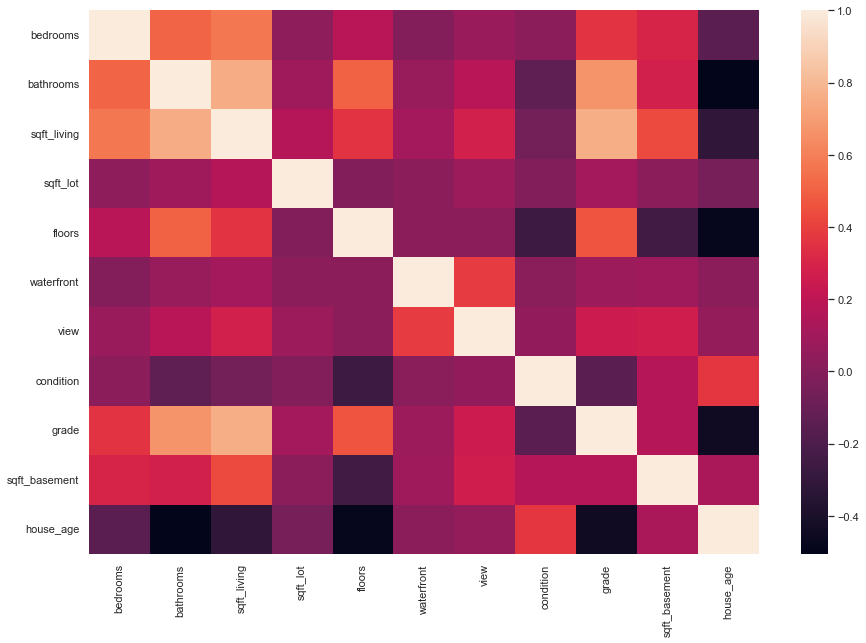

In [28]:
#Inspecting correlation visually
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(X.corr())

In [29]:
#Pairs of highly correlated independent variables
df = data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df.columns = ['cc']

df.drop_duplicates(inplace=True)

df[(df.cc>.75) & (df.cc<1)]

,cc
pairs,
"(sqft_living, grade)",0.763987
"(bathrooms, sqft_living)",0.753997


The two sets of variables are highly correlated.
As for the first pair,we can drop the ```grade``` feature since there is the ```condition``` feature which is relatively not very different from ```grade``` feature.
Although,for the second pair we need both the independent variables for our analysis so we won't drop either but keep this correlation in mind.


In [40]:
data.drop(['grade'], axis=1, inplace=True)
data.head()

,price,sqft_living,sqft_lot,sqft_basement,house_age,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,...,floors_3.5,waterfront_1.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_4,condition_5
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,1180,5650,0.0,59,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6414100192,538000.0,2570,7242,400.0,63,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2487200875,604000.0,1960,5000,910.0,49,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1954400510,510000.0,1680,8080,0.0,28,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7237550310,1230000.0,5420,101930,1530.0,13,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### **Feature normalization**

Let us have a look at the distribution of our data

C:\Users\user\AppData\Local\Temp/ipykernel_5548/2952110290.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax = ax)


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>],
       [<AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'house_age'}>]], dtype=object)

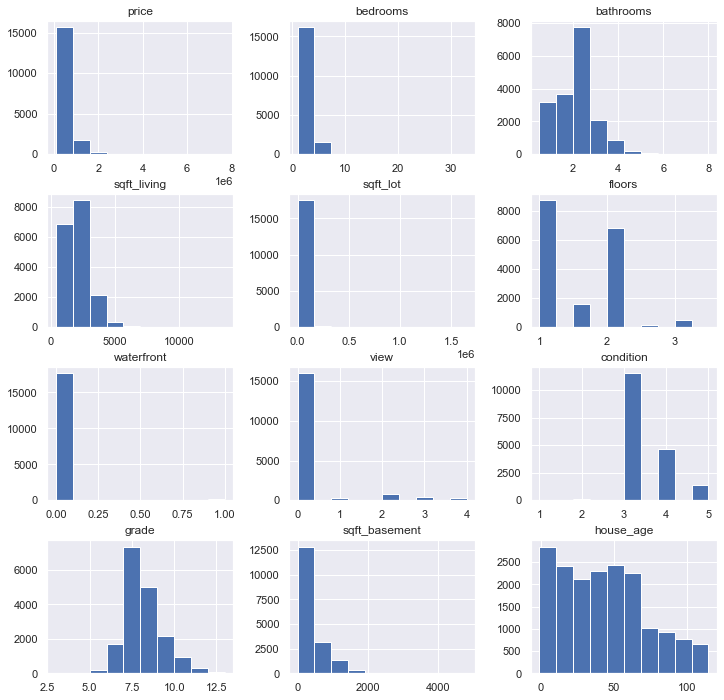

In [31]:
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
data.hist(ax = ax)

Most of the distributions are non-normal so we can perform log transformations where it makes sense so as to normalize the data 

In [32]:
continuous = ['price', 'sqft_living', 'sqft_lot']
data_cont = data[continuous]

array([[<AxesSubplot:title={'center':'price_log'}>,
        <AxesSubplot:title={'center':'sqft_living_log'}>],
       [<AxesSubplot:title={'center':'sqft_lot_log'}>, <AxesSubplot:>]],
      dtype=object)

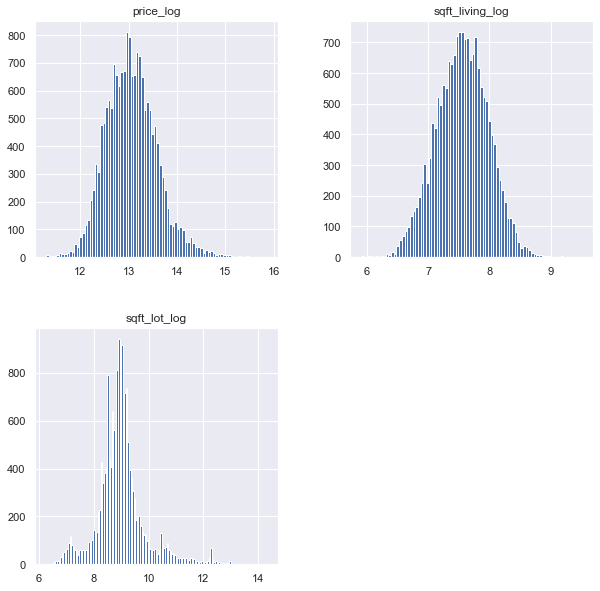

In [38]:
import warnings
warnings.filterwarnings("ignore")


log_names = [f'{column}_log' for column in data_cont.columns]

data_log = np.log(data_cont)
data_log.columns = log_names
data_log.hist(figsize=(10,10), bins='auto')



### **Encoding categorical data**

In [38]:
category=["bedrooms","bathrooms","floors","waterfront","view","condition"]

In [39]:
for cat in category:
    dummies = pd.get_dummies(data[cat], prefix=cat ,drop_first=True)
    data = data.drop(cat, axis=1)
    data = pd.concat([data, dummies], axis=1)

In [42]:
data.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_basement', 'house_age',
       'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6',
       'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'bedrooms_10', 'bedrooms_11',
       'bedrooms_33', 'bathrooms_0.75', 'bathrooms_1.0', 'bathrooms_1.25',
       'bathrooms_1.5', 'bathrooms_1.75', 'bathrooms_2.0', 'bathrooms_2.25',
       'bathrooms_2.5', 'bathrooms_2.75', 'bathrooms_3.0', 'bathrooms_3.25',
       'bathrooms_3.5', 'bathrooms_3.75', 'bathrooms_4.0', 'bathrooms_4.25',
       'bathrooms_4.5', 'bathrooms_4.75', 'bathrooms_5.0', 'bathrooms_5.25',
       'bathrooms_5.5', 'bathrooms_5.75', 'bathrooms_6.0', 'bathrooms_6.5',
       'bathrooms_6.75', 'bathrooms_7.5', 'bathrooms_7.75', 'bathrooms_8.0',
       'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5',
       'waterfront_1.0', 'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0',
       'condition_2', 'condition_3', 'condition_4', 'condition_5'],
      dtype='obje

## **Data modeling**

In [43]:
from sklearn.model_selection import train_test_split

#split data into dependent feature & independent feature
X = data.drop('price',axis=1)
y=data['price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 10 )

In [50]:
x_train.head()

,sqft_living,sqft_lot,sqft_basement,house_age,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,...,floors_3.5,waterfront_1.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_4,condition_5
id,,,,,,,,,,,,,,,,,,,,,
832700320,1490,2478,0.0,6,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1250201640,2540,7200,940.0,109,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7379700051,1590,14766,0.0,52,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1326059142,3520,128502,0.0,33,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7230900120,2140,7641,850.0,35,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
y_train.head()

id
832700320      348000.0
1250201640     775000.0
7379700051     375000.0
1326059142    1400000.0
7230900120     339950.0
Name: price, dtype: float64

In [53]:
#let's look at correlation with our target variable'price'
price_corr=data.corr()["price"].map(abs).sort_values(ascending=False)
price_corr

price             1.000000
sqft_living       0.703690
sqft_basement     0.319849
view_4.0          0.296652
waterfront_1.0    0.268196
bathrooms_1.0     0.242945
floors_2.0        0.229487
bathrooms_3.5     0.198678
bathrooms_3.25    0.191939
bedrooms_5        0.186362
bedrooms_3        0.184235
view_3.0          0.179062
bedrooms_4        0.174394
bathrooms_4.25    0.174003
bathrooms_4.0     0.160009
view_2.0          0.154963
bathrooms_4.5     0.152414
bathrooms_3.75    0.149524
bedrooms_2        0.142324
bathrooms_5.5     0.134639
bathrooms_4.75    0.132952
floors_2.5        0.131239
bathrooms_7.75    0.129037
bathrooms_8.0     0.127881
bathrooms_6.0     0.119872
view_1.0          0.095877
bathrooms_1.5     0.095774
bathrooms_5.25    0.093626
bathrooms_5.0     0.093383
bathrooms_1.75    0.093307
bedrooms_6        0.091644
sqft_lot          0.086070
bathrooms_3.0     0.084769
bathrooms_6.75    0.083920
bathrooms_2.75    0.075157
bathrooms_2.0     0.070109
bedrooms_7        0.056966
c

For our initial model,we will build a model with the most correlated variable to ```price``` which happens to be ```sqft_living ``` but first lets see this relatioship visually using a sctter plot.

Text(0, 0.5, 'home footage')

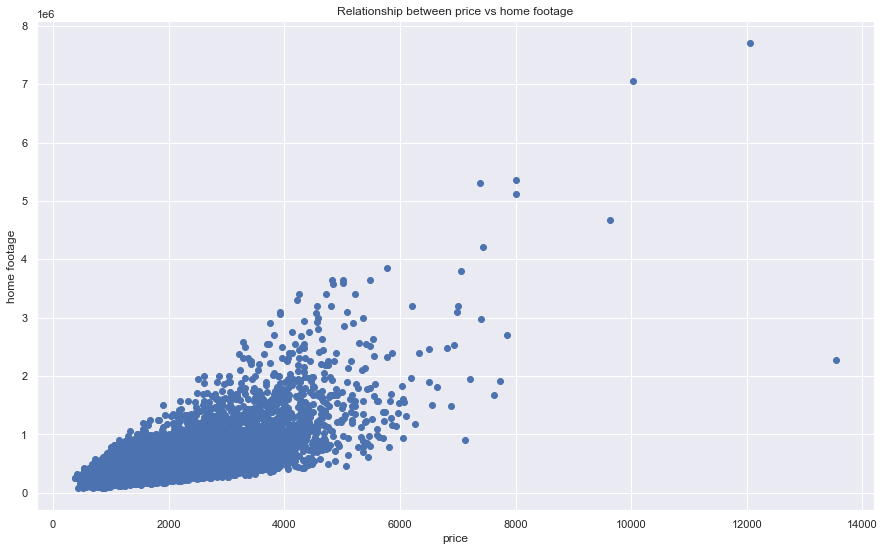

In [59]:
fig,ax=plt.subplots(figsize=(15,9))
x = x_train['sqft_living']
y = y_train
ax.scatter(x,y)
ax.set_title("Relationship between price vs home footage")
ax.set_xlabel("price")
ax.set_ylabel("home footage")

Generally,It seems that the larger the home area, the more pricey a house is.
Roughly,many homes have a home footage of between 400 to 5000 

In [65]:
#fitting our model
from statsmodels.formula.api import ols
import statsmodels.api as sm

sm.OLS(y_train, sm.add_constant(x_train['sqft_living'])).fit().summary()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                 1.173e+04
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:54:51   Log-Likelihood:            -1.7260e+05
No. Observations:               12428   AIC:                         3.452e+05
Df Residuals:                   12426   BIC:                         3.452e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.872e+04   5818.926     -6.655      0.000   -5.01e+04   -2.73e+04
sqft_living   277.8389      2.566    108.290      0.000     272.810     282.868
==============================================================================
Omnibus:                     9076.219   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           420129.706
Skew:                           3.017   Prob(JB):                         0.00
Kurtosis:                      30.837   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""